In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
import GEFv6
reload(GEFv6)
from GEFv6 import GEF
#from GEF import GEF as GEF2
from utilities import PlotComp
from scipy.interpolate import CubicSpline, RectBivariateSpline
from scipy.integrate import quad
from scipy.optimize import fsolve
import os

In [2]:
alpha = 0.
Mpl = 1.
beta = 25.
M = 6e-6*Mpl
phi0 = 15.55*Mpl
dphidt0 = -np.sqrt(2/3)*M*Mpl
ini = {"phi":phi0, "dphi":dphidt0, "delta":1.0, "rhoChi":0.0}
SE = -1.0
ntr = 55
H = GEF(alpha, beta, Mpl, ini, M, ntr, SE, AltDamp=2, approx=True)
#G = GEF(alpha, beta, Mpl, ini, M, ntr, SE, AltDamp=0, approx=True)
tend = 118.

In [3]:
sol = H.RunGEF(t1=tend)

H.Unitful()
Ntmp = H.vals["N"]
Etmp = H.vals["E"]
Btmp = H.vals["B"]
Gtmp = abs(H.vals["G"])
deltatmp = H.vals["delta"]

Elapsed time: 36.1022 seconds


/home/users/rfreiher/Documents/Axion_Inflation/GEF/GEFv6.py:762: RuntimeWarning: invalid value encountered in log
  f = lambda x: np.log(kSf(x)/khf(ts[i]))
/home/users/rfreiher/.conda/envs/ptarcade/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


delta function created, access using x.deltaf
Elapsed time: 145.0006 seconds
True
delta function created, access using x.deltaf


/home/users/rfreiher/Documents/Axion_Inflation/GEF/utilities.py:12: RuntimeWarning: invalid value encountered in divide
  ax2.plot(Nref, abs(spl/Yref-1), col)


Elapsed time: 140.8669 seconds
True


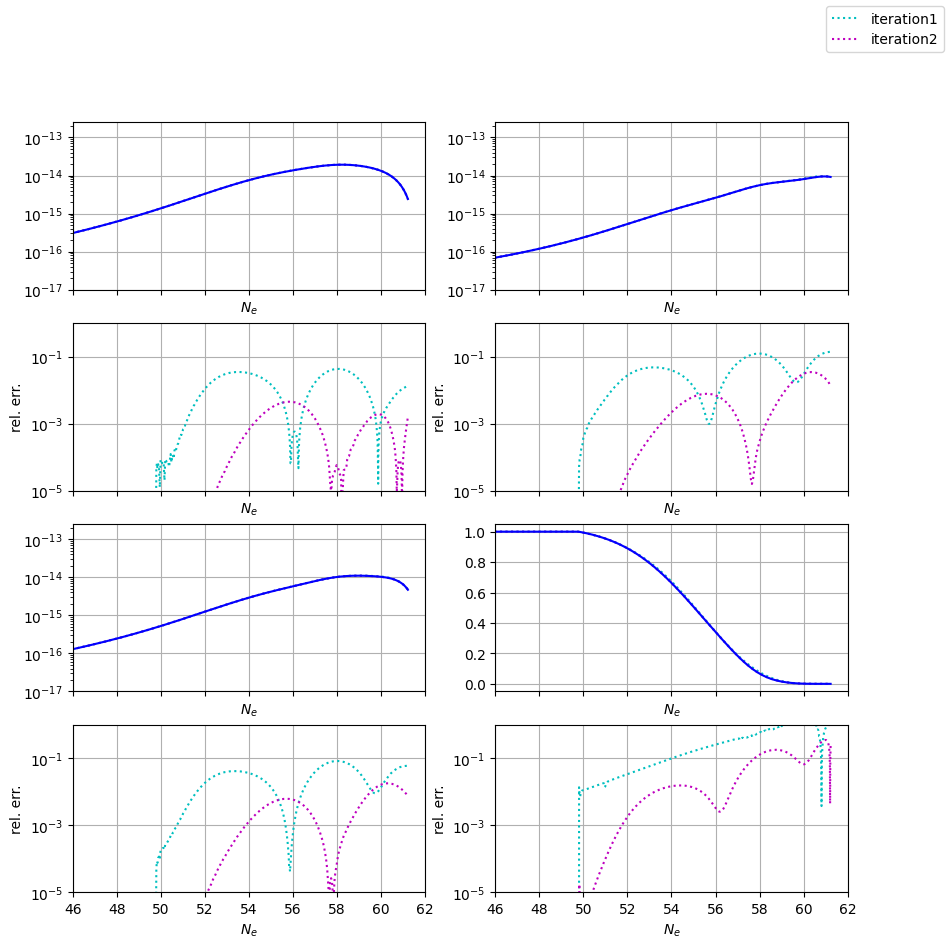

In [4]:
col = np.array(["c:", "m:"])#, "g:", "r:", "y:"])

#fig1, ax1 = plt.subplots(3,2, figsize=(10,10), sharex=True)
fig2, ax2 = plt.subplots(4,2, figsize=(10,10), sharex=True)

for i in range(col.size):
    sol = H.IterateGEF(t1=tend)
    print(sol.success)
    t = H.vals["t"]
    """ ax1[0,0].plot(t, H.Epf(t), col[i], label="iteration" + str(i+1))
    ax1[0,1].plot(t, H.Emf(t), col[i])
    ax1[1,0].plot(t, H.Bpf(t), col[i])
    ax1[1,1].plot(t, H.Bmf(t), col[i])
    ax1[2,0].plot(t, -H.Gpf(t), col[i])
    ax1[2,1].plot(t, -H.Gmf(t), col[i])"""
    
    H.Unitful()
    N = H.vals["N"]
    delta = H.vals["delta"]
    E = H.vals["E"]
    B = H.vals["B"]
    G = abs(H.vals["G"])
    PlotComp(ax2[0,0], ax2[1,0], N, E, Ntmp, Etmp, col=col[i], label="iteration" + str(i+1))
    PlotComp(ax2[0,1], ax2[1,1], N, B, Ntmp, Btmp, col=col[i])
    PlotComp(ax2[2,0], ax2[3,0], N, G, Ntmp, Gtmp, col=col[i])
    PlotComp(ax2[2,1], ax2[3,1], N, delta, Ntmp, deltatmp, col=col[i])
    
    Ntmp = N
    Etmp = E
    Btmp = B
    Gtmp = G
    deltatmp = delta
    
"""ax1[0,0].plot(t, H.Epf2(t), "b-")
ax1[0,1].plot(t, H.Emf2(t), "b-")
ax1[1,0].plot(t, H.Bpf2(t), "b-")
ax1[1,1].plot(t, H.Bmf2(t), "b-")
ax1[2,0].plot(t, -H.Gpf2(t), "b-")
ax1[2,1].plot(t, -H.Gmf2(t), "b-")"""
ax2[0,0].plot(Ntmp, Etmp, "b-")
ax2[0,1].plot(Ntmp, Btmp, "b-")
ax2[2,0].plot(Ntmp, Gtmp, "b-")
ax2[2,1].plot(Ntmp, deltatmp, "b-")
    
"""for ax in fig1.axes:
    ax.grid(True)
    ax.set_ylim(-1., 10.)"""
    
ax2[0,0].set_ylim(1e-17, 2.5e-13)
ax2[0,1].set_ylim(1e-17, 2.5e-13)
ax2[2,0].set_ylim(1e-17, 2.5e-13)
ax2[0,0].set_yscale("log")
ax2[0,1].set_yscale("log")
ax2[2,0].set_yscale("log")

ax2[1,0].set_ylim(1e-5, 1e0)
ax2[1,1].set_ylim(1e-5, 1e0)
ax2[3,0].set_ylim(1e-5, 1e0)
ax2[3,1].set_ylim(1e-5, 1e0)

for ax in fig2.axes:
    ax.grid(True)
    ax.set_xlim(46., 62.)
    #ax.set_xlim(48.5, 50.5)

"""lines_labels = [ax1[0,0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig1.legend(lines, labels)"""
lines_labels = [ax2[0,0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig2.legend(lines, labels)

plt.show()
